## 数据的EDA入门
1. 数据属性与Target的相关性分析

2. 属性间的相关性分析[Correlation]

3. 缺失属性相关性分析--合理填充

4. 构造属性的相关性分析

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
train = pd.read_csv('data/train.csv') #训练集的获取

In [82]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [83]:
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [84]:
train1 = train # 拷贝数据

-----

## 开始数据的EDA

### 分析属性与SalePrice的相关性
相关性分析：正相关、负相关、强相关、弱相关

$r \in [-1,1]$

- |r| > 0.95：存在显著关系
- |r| >= 0.8：高度相关
- |r| >= 0.5：中度相关
- 0.5 >= |r| <= 0.3：低相关
- |r| < 0.3：极弱相关
- r < 0：负相关
- r = 0：无关
- r = 1：线性关系

In [85]:
# 拿到SalePrice的相关性矩阵
corr = train.corr()['SalePrice']

In [86]:
corr[corr >= 0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [87]:
corr[corr < 0]

Id              -0.021917
MSSubClass      -0.084284
OverallCond     -0.077856
BsmtFinSF2      -0.011378
LowQualFinSF    -0.025606
BsmtHalfBath    -0.016844
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MiscVal         -0.021190
YrSold          -0.028923
Name: SalePrice, dtype: float64

### HeatMap进行协方差可视化

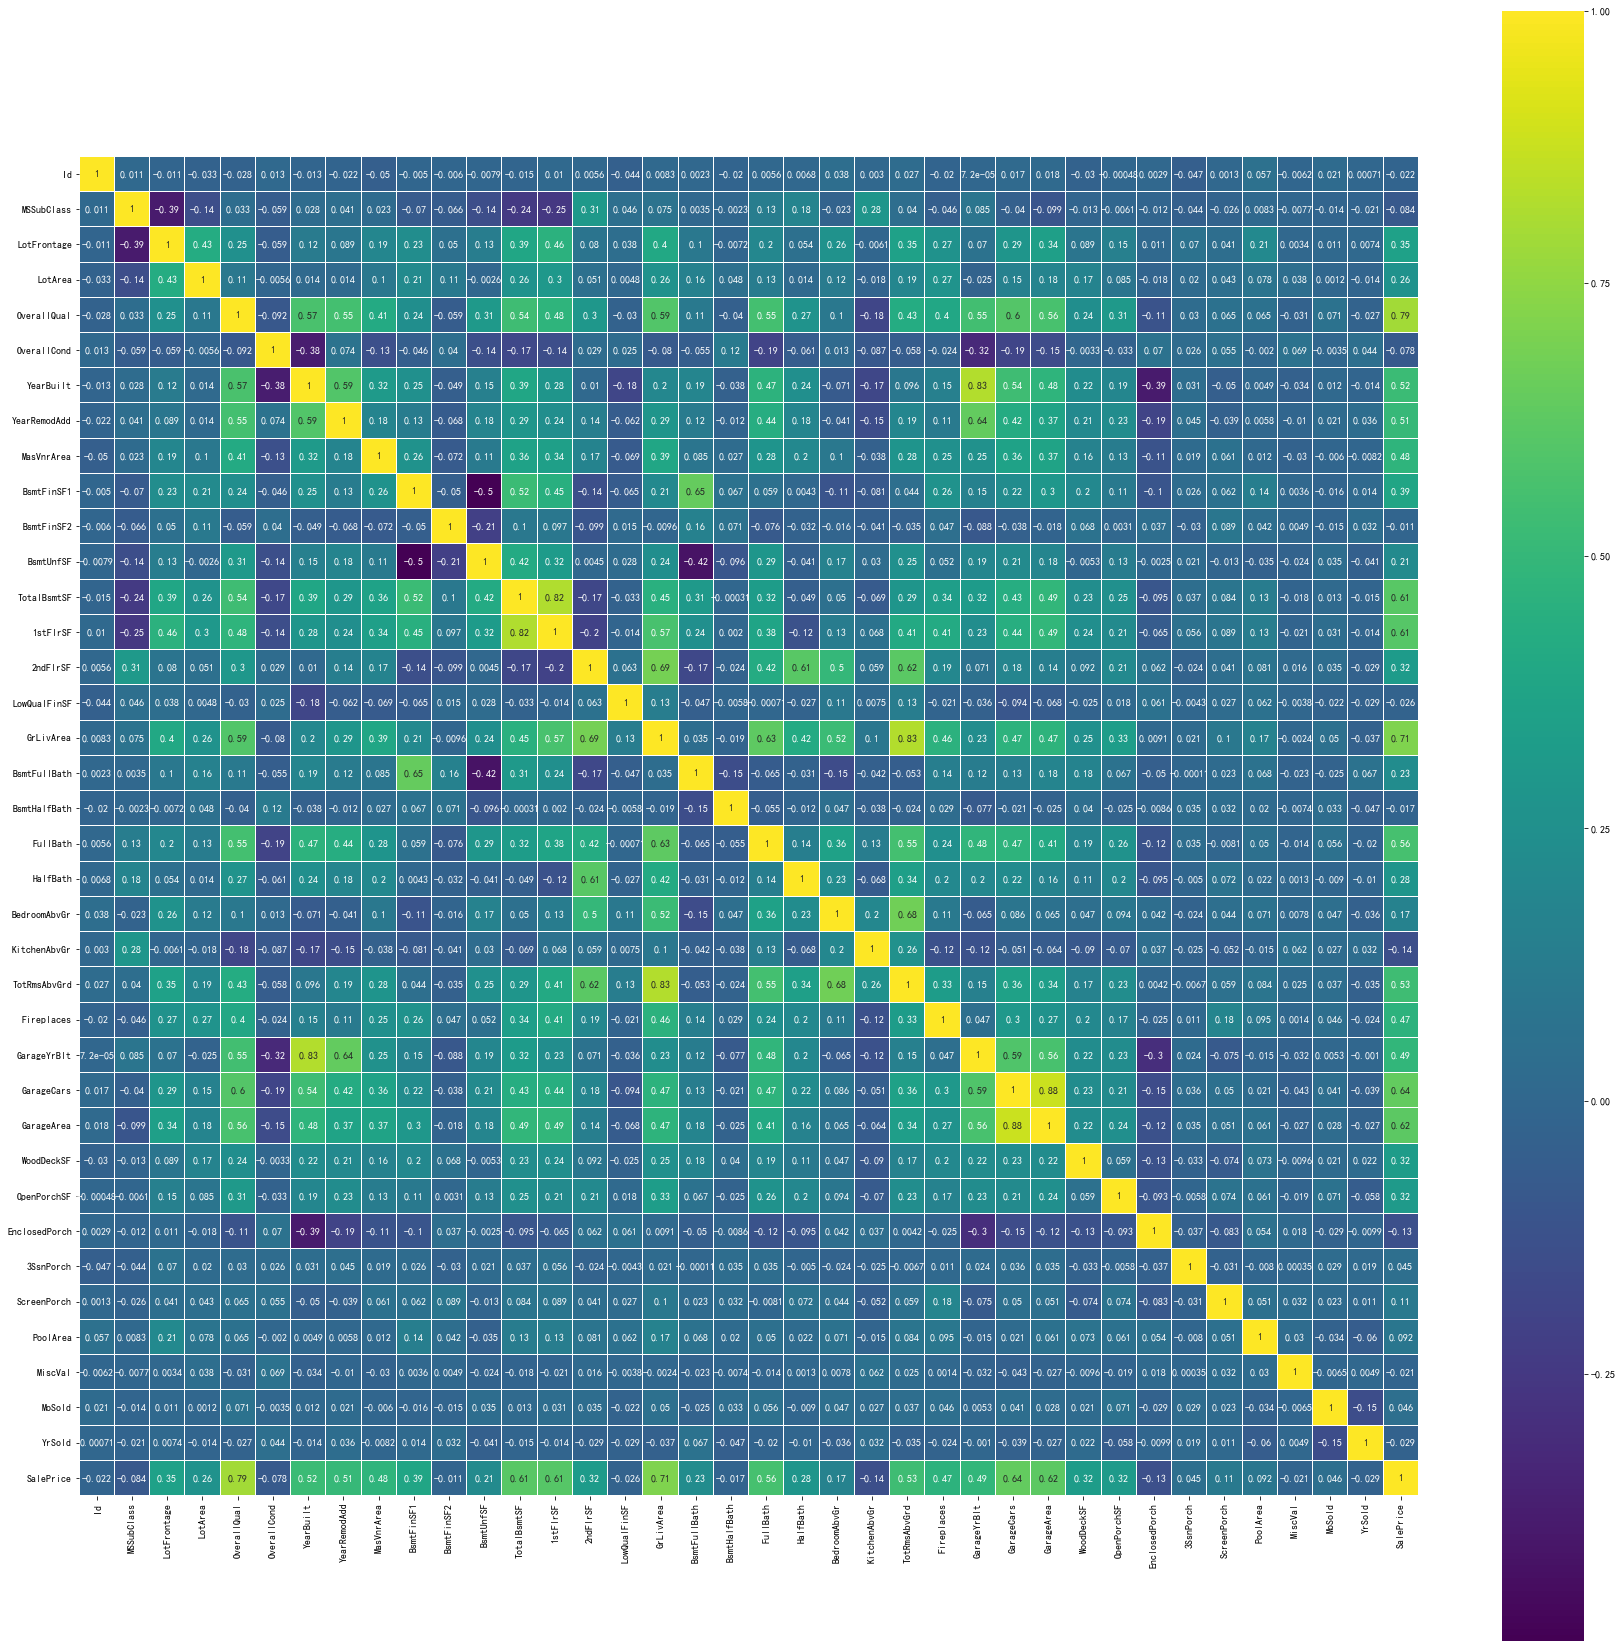

In [88]:
plt.figure(figsize = (30,30))
sns.heatmap(train.corr(),linewidths = 0.01,square = True, cmap = 'viridis', annot = True)

### 特征观察

观察相关性比较强的特征与Target目标值之间的关系【统计图来进行观察】

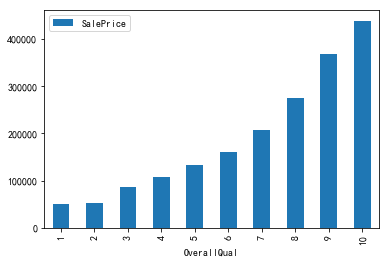

In [89]:
# 'OverallQual' 与 'SalePrice'之间的关系
train[['OverallQual','SalePrice']].groupby(['OverallQual']).mean().plot.bar()

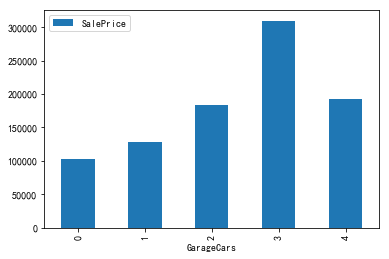

In [90]:
# 'GarageCars' 与 'SalePrice'之间的关系
train[['GarageCars','SalePrice']].groupby(['GarageCars']).mean().plot.bar()

In [91]:
# 'GarageCars' 与 'GarageArea' 之间的关系
train[['GarageCars','GarageArea']].groupby(['GarageCars']).mean().plot.bar().

SyntaxError: invalid syntax (<ipython-input-91-51a60dc885e1>, line 2)

In [ ]:
# 'GarageCars' 与 'GarageArea' 之间的相关性
np.corrcoef(train['GarageCars'],train['GarageArea'])

### 关于SalePrice与其他变量相关性分析
1. 画出相关性柱状图
2. 画出正相关的图
3. 查看散点佐证相关性
4. 决定去掉的列

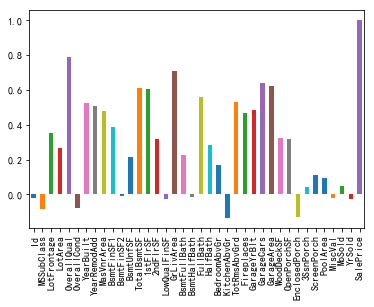

In [92]:
corr = train.corr()
corr['SalePrice'].plot.bar()

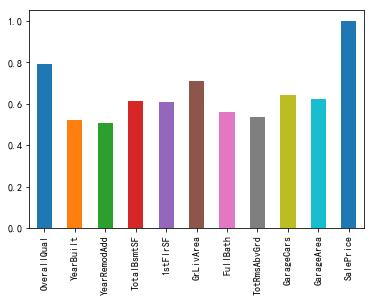

In [93]:
corr = corr['SalePrice']
corr[corr > 0.5].plot.bar()

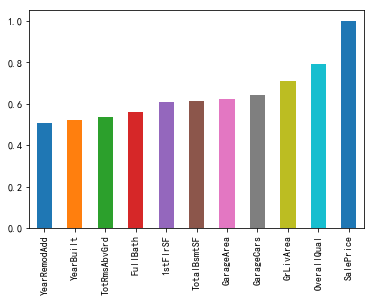

In [94]:
corr[corr > 0.5].sort_values().plot.bar()

mean 

### OverallQual 与 SalePrice的相关性分析

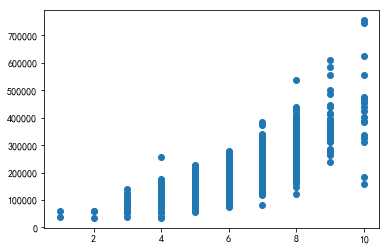

In [95]:
plt.scatter(train['OverallQual'],train['SalePrice'])

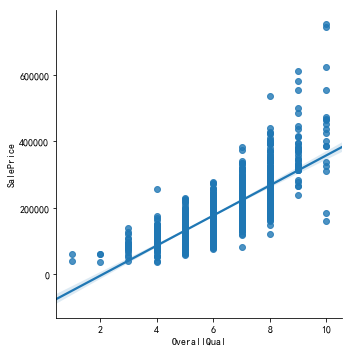

In [96]:
sns.lmplot('OverallQual','SalePrice',data=train)

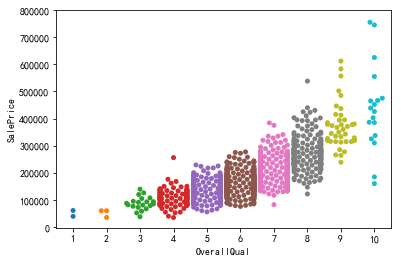

In [97]:
sns.swarmplot('OverallQual','SalePrice',data=train)

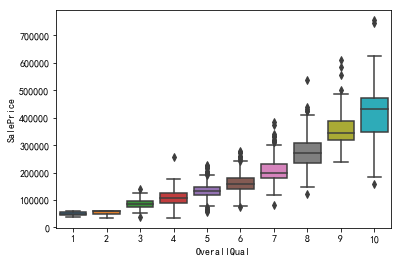

In [98]:
sns.boxplot('OverallQual','SalePrice',data=train)

### GrLivArea 与 SalePrice的相关性分析

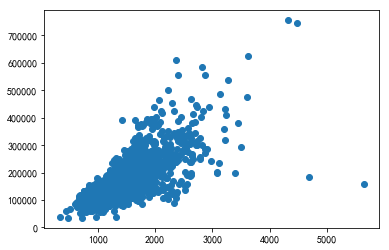

In [99]:
plt.scatter('GrLivArea','SalePrice',data=train)

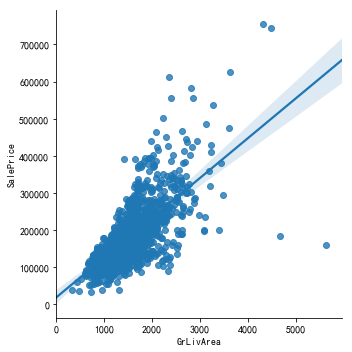

In [100]:
sns.lmplot('GrLivArea','SalePrice',data=train)

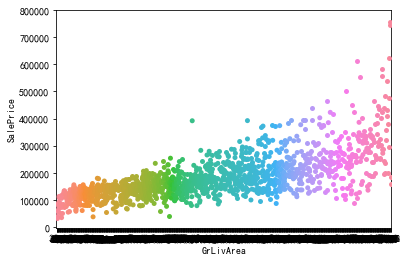

In [101]:
sns.swarmplot('GrLivArea','SalePrice',data=train)

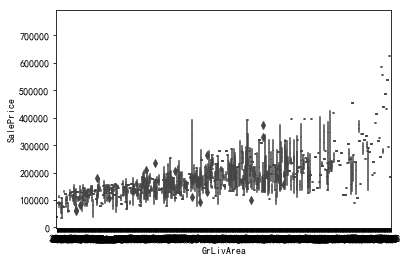

In [103]:
sns.boxplot('GrLivArea','SalePrice',data=train)

----

## 空值填充

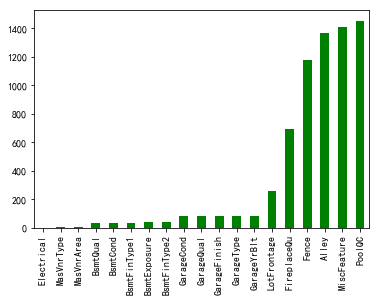

In [104]:
x = train.isnull().sum()
x[x > 0].sort_values().plot.bar(color = 'g')

### 填充LotFrontage

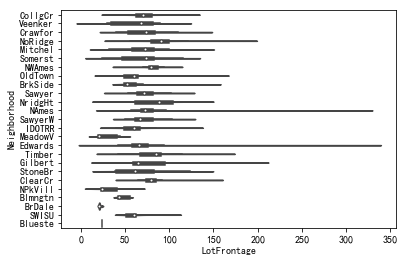

In [105]:
sns.violinplot(train['LotFrontage'],train['Neighborhood'])

#### 思路1.取不同的Neighborhood的均值/中位数

作业题：使用思路1进行填充，得到训练集进行训练与思路2结果进行比较

In [106]:
neighborhood_goup = train.groupby('Neighborhood')
lot_midians = neighborhood_goup['LotFrontage'].median()
lot_midians

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [107]:
train[train['LotFrontage'].isnull()]['Neighborhood']

7        NWAmes
12       Sawyer
14        NAmes
16        NAmes
24       Sawyer
31       Sawyer
42      SawyerW
43      CollgCr
50      Gilbert
64      CollgCr
66        NAmes
76        NAmes
84      Gilbert
95      Gilbert
100      NWAmes
104      IDOTRR
111     Gilbert
113     Crawfor
116      Sawyer
120     ClearCr
126     NPkVill
131     Gilbert
133      Timber
136       NAmes
147     Gilbert
149     BrkSide
152      NWAmes
153     ClearCr
160     Veenker
166     ClearCr
         ...   
1300    Gilbert
1301    Crawfor
1309    SawyerW
1312    NoRidge
1318    CollgCr
1321    BrkSide
1342    CollgCr
1346     NWAmes
1348    SawyerW
1354    CollgCr
1356      NAmes
1357      NAmes
1358    Somerst
1362      NAmes
1365    Somerst
1368    CollgCr
1373    NoRidge
1381      NAmes
1383     Sawyer
1396     Timber
1407    Mitchel
1417    NoRidge
1419    Crawfor
1423    Edwards
1424      NAmes
1429     NWAmes
1431    NPkVill
1441    CollgCr
1443    BrkSide
1446    Mitchel
Name: Neighborhood, Leng

#### 思路2.通过LotArea计算出LotFrontage

In [108]:
train['LotFrontage'].corr(np.sqrt(train['LotArea']))

0.6020022167939364

In [109]:
train['SqrtLotArea'] = np.sqrt(train['LotArea']) #新增一列SqrtLotArea

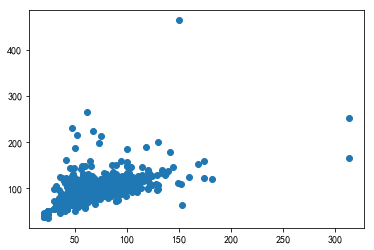

In [110]:
plt.scatter('LotFrontage','SqrtLotArea',data=train)

/home/demeen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/demeen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


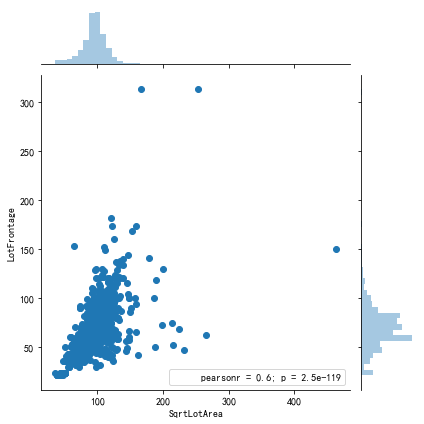

In [111]:
sns.jointplot('SqrtLotArea','LotFrontage',data=train)

从上图得到 SqrtLotArea = 0.6 * LotFrontage + 2.5e-119

In [112]:
filter = train['LotFrontage'].isnull()
type(filter)

pandas.core.series.Series

In [113]:
train[filter] # 输出DataFrame && LotFrontage == NAN

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,101.892100
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,144000,113.877127
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000,104.498804
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,700,3,2010,WD,Normal,149000,106.023582
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000,90.807489
31,32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350,92.433760
42,43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000,95.812317
43,44,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250,95.916630
50,51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2007,WD,Normal,177000,117.766719
64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500,96.824584


In [114]:
train.LotFrontage[filter] = 0.6 * train.SqrtLotArea[filter]

/home/demeen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


至此，LotFrontage填充完成

### MasVnrType 和 MasVnrArea填充

In [116]:
x = train.isnull().sum()
x[x > 0]

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

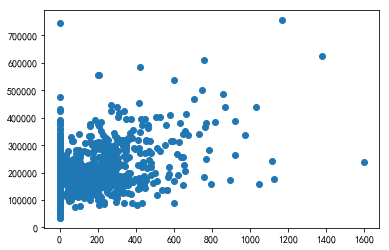

In [122]:
plt.scatter(train['MasVnrArea'],train['SalePrice'])

/home/demeen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/demeen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


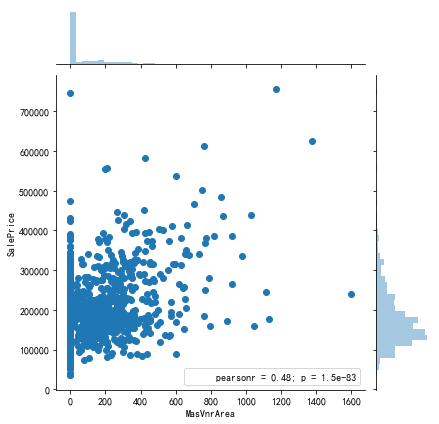

In [123]:
sns.jointplot(train['MasVnrArea'],train['SalePrice'])

从上图看出MasVnrArea与SalePrice的相关性很低

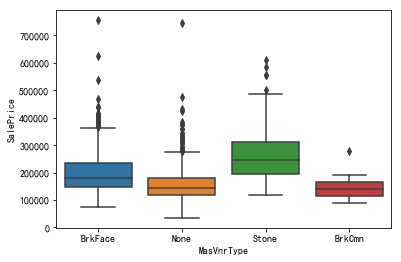

In [124]:
sns.boxplot(train['MasVnrType'],train['SalePrice'])

### MasVnrType的频率分析

In [125]:
train.groupby(['MasVnrType']).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,15,15,15,15,15,15,0,15,15,15,...,0,7,2,15,15,15,15,15,15,15
BrkFace,445,445,445,445,445,445,10,445,445,445,...,2,80,11,445,445,445,445,445,445,445
None,864,864,864,864,864,864,77,864,864,864,...,4,188,40,864,864,864,864,864,864,864
Stone,128,128,128,128,128,128,3,128,128,128,...,1,6,1,128,128,128,128,128,128,128


In [131]:
train[train.MasVnrType=='None'][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
10,None,0.0
12,None,0.0
15,None,0.0
17,None,0.0
18,None,0.0


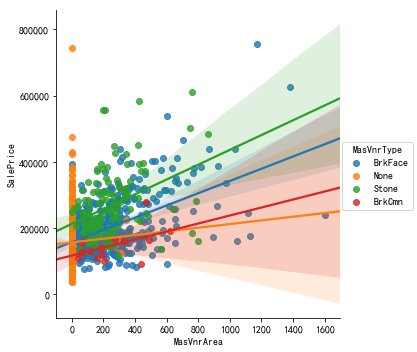

In [136]:
sns.lmplot('MasVnrArea','SalePrice',hue='MasVnrType',data=train)

In [139]:
filter = train['MasVnrArea'].isnull()
train.MasVnrArea[filter] = 0.0

/home/demeen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [140]:
flter = train['MasVnrType'].isnull()
train.MasVnrType[filter] = 'None'

/home/demeen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


至此，MasVnrArea 与 MasVnrType填充完成

In [160]:
def getNullCount():
    x = train.isnull().sum()
    print(x[x > 0])
    x[x > 0].sort_values().plot.bar()

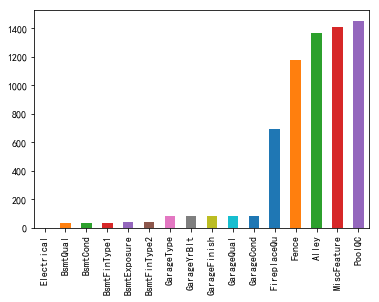

In [142]:
getNullCount()

### Electrical填充

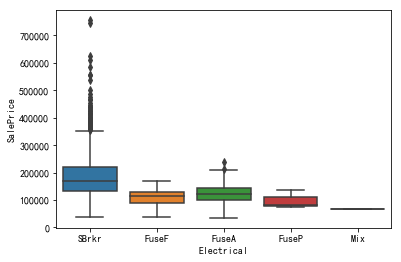

In [144]:
sns.boxplot('Electrical','SalePrice',data=train)

In [145]:
train.groupby(['Electrical']).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
Electrical,,,,,,,,,,,,,,,,,,,,,
FuseA,94,94,94,94,94,94,12,94,94,94,...,0,23,2,94,94,94,94,94,94,94
FuseF,27,27,27,27,27,27,4,27,27,27,...,0,2,0,27,27,27,27,27,27,27
FuseP,3,3,3,3,3,3,2,3,3,3,...,0,0,0,3,3,3,3,3,3,3
Mix,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,1,1,1,1,1
SBrkr,1334,1334,1334,1334,1334,1334,73,1334,1334,1334,...,7,256,52,1334,1334,1334,1334,1334,1334,1334


In [150]:
num_max_electrical = train['Electrical'].mode()[0] # 取得众数
filter = train['Electrical'].isnull()
train['Electrical'][filter] = num_max_electrical

/home/demeen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


至此，Electrical填充完成

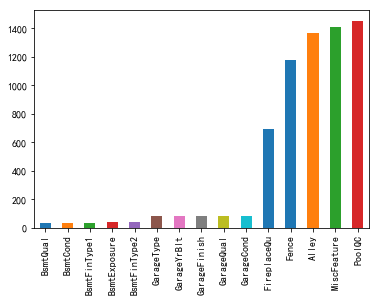

In [151]:
getNullCount()

### Alley填充

In [152]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

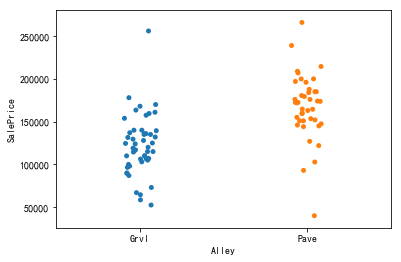

In [153]:
sns.stripplot(train['Alley'],train['SalePrice'],jitter=True)

In [155]:
train['Alley'] = train['Alley'].fillna('None')

至此，Alley填充完成

BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


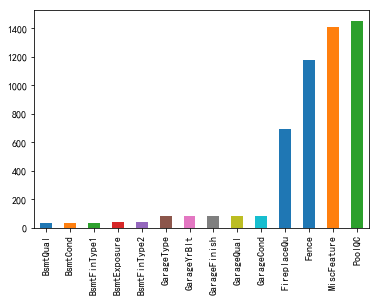

In [161]:
getNullCount()

### BaseMent群填充

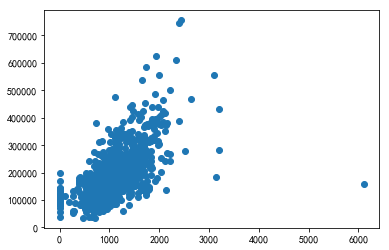

In [163]:
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])

/home/demeen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/demeen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


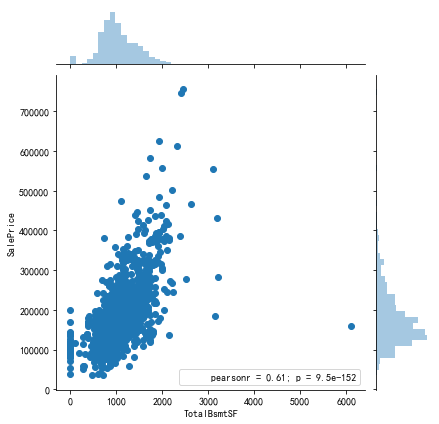

In [164]:
sns.jointplot(train['TotalBsmtSF'],train['SalePrice'])

In [166]:
basement_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
print(train[basement_cols + ['TotalBsmtSF']][train['BsmtQual'].isnull() == True])

     BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF
17        NaN      NaN          NaN          NaN          NaN            0
39        NaN      NaN          NaN          NaN          NaN            0
90        NaN      NaN          NaN          NaN          NaN            0
102       NaN      NaN          NaN          NaN          NaN            0
156       NaN      NaN          NaN          NaN          NaN            0
182       NaN      NaN          NaN          NaN          NaN            0
259       NaN      NaN          NaN          NaN          NaN            0
342       NaN      NaN          NaN          NaN          NaN            0
362       NaN      NaN          NaN          NaN          NaN            0
371       NaN      NaN          NaN          NaN          NaN            0
392       NaN      NaN          NaN          NaN          NaN            0
520       NaN      NaN          NaN          NaN          NaN            0
532       NaN      NaN   

In [167]:
train[train.BsmtCond == 'NA']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea


In [168]:
for col in basement_cols:
    if 'FinSF' not in col:
        train[col] = train[col].fillna('None')

至此，Bsmt群填充完成

FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


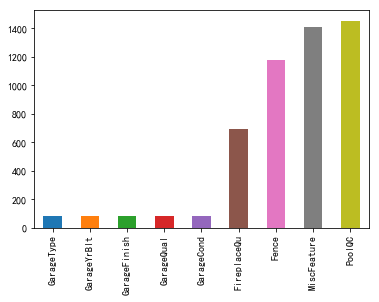

In [170]:
getNullCount()

### FireplaceQu填充

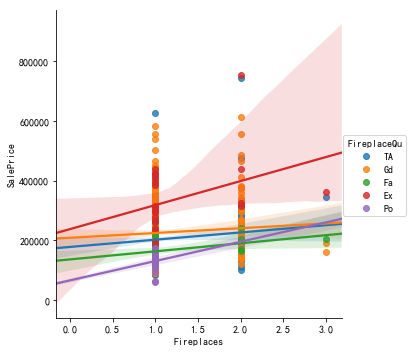

In [181]:
sns.lmplot('Fireplaces','SalePrice',data=train,hue='FireplaceQu')

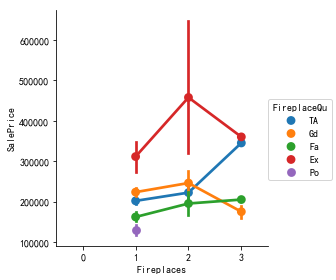

In [182]:
sns.factorplot('Fireplaces','SalePrice',data = train, hue = 'FireplaceQu')

In [184]:
train[train['FireplaceQu'].isnull()]['Fireplaces']

0       0
5       0
10      0
12      0
15      0
17      0
18      0
19      0
26      0
29      0
30      0
31      0
32      0
36      0
38      0
39      0
42      0
43      0
44      0
47      0
48      0
49      0
50      0
52      0
56      0
57      0
59      0
60      0
61      0
63      0
       ..
1391    0
1397    0
1398    0
1403    0
1404    0
1406    0
1407    0
1408    0
1410    0
1411    0
1412    0
1416    0
1418    0
1422    0
1425    0
1431    0
1432    0
1436    0
1438    0
1444    0
1445    0
1446    0
1448    0
1449    0
1450    0
1452    0
1453    0
1454    0
1458    0
1459    0
Name: Fireplaces, Length: 690, dtype: int64

In [187]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

至此，FirePlaceQu填充完成

GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


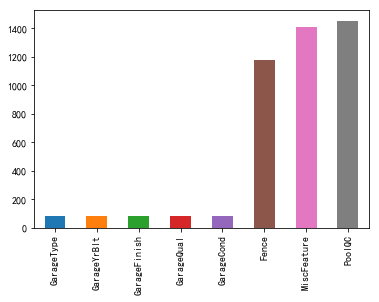

In [188]:
getNullCount()

### Garage群填充

/home/demeen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


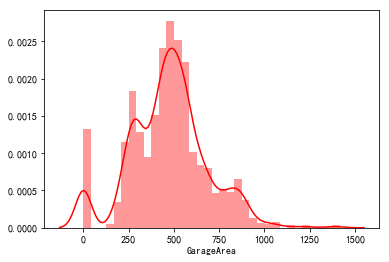

In [190]:
# 查看车库大小的分布
sns.distplot(train['GarageArea'],color = 'r',kde = True)

/home/demeen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/demeen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


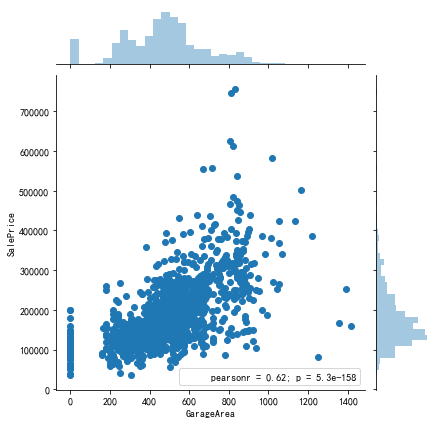

In [191]:
# 查看车库大小和SalePrice的关系
sns.jointplot('GarageArea','SalePrice',data=train)

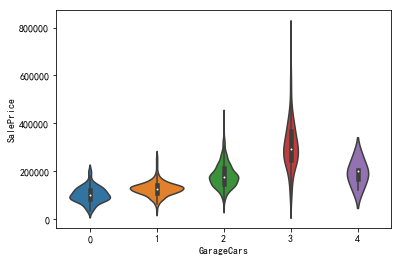

In [192]:
sns.violinplot(train['GarageCars'],train['SalePrice'])

上图三个车库的价格分布很大，原因可能是：郊区便宜，市中心贵

In [198]:
garage_cols = ['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
train[garage_cols][train['GarageType'].isnull()]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


In [204]:
for col in garage_cols:
    if train[col].dtype == np.object:
        train[col] = train[col].fillna('None')
    else:
        train[col] = train[col].fillna(0)

至此，Garage群填充完成

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


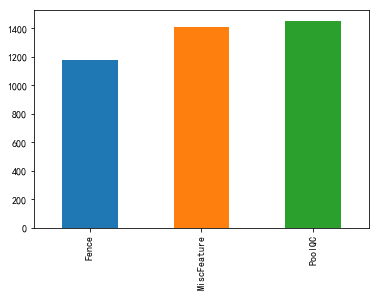

In [205]:
getNullCount()

### PoolQC填充

/home/demeen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


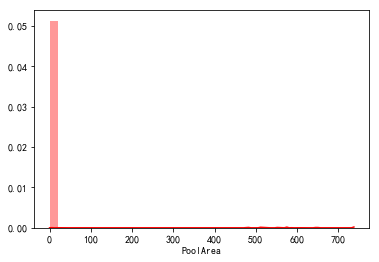

In [206]:
sns.distplot(train['PoolArea'],color = 'r', kde = True)

In [207]:
train[train.PoolQC.isnull()][['PoolQC','PoolArea']]

,PoolQC,PoolArea
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0
6,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0


In [208]:
train.PoolQC = train.PoolQC.fillna('None')

至此，PoolQC填充完成

Fence          1179
MiscFeature    1406
dtype: int64


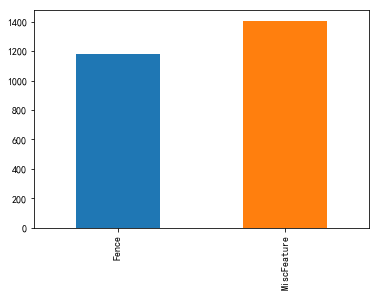

In [209]:
getNullCount()

### Fence填充

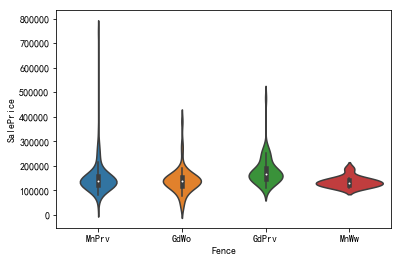

In [210]:
sns.violinplot(train['Fence'],train['SalePrice'])

In [212]:
train[train['Fence'].isnull()]['Fence']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
16      NaN
17      NaN
18      NaN
20      NaN
22      NaN
23      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
       ... 
1421    NaN
1422    NaN
1425    NaN
1426    NaN
1427    NaN
1429    NaN
1430    NaN
1431    NaN
1432    NaN
1433    NaN
1434    NaN
1437    NaN
1439    NaN
1440    NaN
1441    NaN
1442    NaN
1443    NaN
1444    NaN
1445    NaN
1446    NaN
1447    NaN
1449    NaN
1450    NaN
1451    NaN
1452    NaN
1453    NaN
1454    NaN
1455    NaN
1458    NaN
1459    NaN
Name: Fence, Length: 1179, dtype: object

In [214]:
train['Fence'] = train['Fence'].fillna('None')

至此，Fence填充完成

MiscFeature    1406
dtype: int64


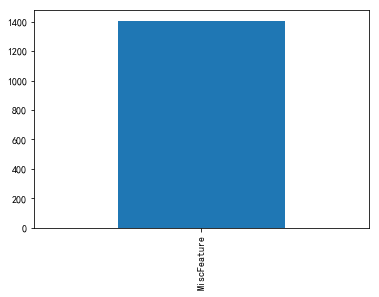

In [216]:
getNullCount()

### MiscFeature填充

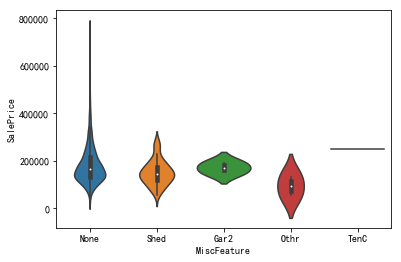

In [284]:
sns.violinplot(train['MiscFeature'],train['SalePrice'])

In [285]:
train[train['MiscFeature'].isnull()]['MiscFeature']

Series([], Name: MiscFeature, dtype: object)

In [286]:
train['MiscFeature'] = train['MiscFeature'].fillna('None')

至此，所有数据填充完成

## 机器学习部分
1. Lasso回归
2. Ridge回归
3. ElasticNet回归
4. SVR回归
5. XGBoost
6. Stacking
7. 神经网络回归

### 数据集的准备

In [288]:
y = train['SalePrice']
train1 = train.drop(['Id','SalePrice'],axis = 1)
x = pd.get_dummies(train1).reset_index(drop = True)
x.shape

(1460, 298)

In [289]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 123)

### 基础线性回归

In [301]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
# Sklearn的模型 .fit 和 .predict的函数
def benchmark(model):
    pred=model.predict(x_test)
    logrmse=np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))
    return logrmse

In [302]:
p = lm.fit(x_train,y_train)

In [303]:
benchmark(lm)

0.1266264180377562

In [304]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [310]:
lmmodel = make_pipeline(RobustScaler(),lm).fit(X=x_train,y=y_train)

In [ ]:
benchmark(lmmodel)

### Ridge Regression

In [331]:
from sklearn.model_selection import KFold

In [332]:
kfolds = KFold(n_splits = 10,shuffle=True,random_state=123)

In [333]:
from sklearn.linear_model import RidgeCV

In [360]:
def ridge_train_test(alpha):
    ridge_model = make_pipeline(RobustScaler(),RidgeCV(alphas=[alpha],cv=kfolds))
    ridge_model.fit(x_train,y_train)
    lrmse = benchmark(ridge_model,x_test,y_test)
    return lrmse

In [364]:
r_alphas=[.0001,.0003,.0005,.01,.3,.5,1,10,15,20,30,50,60,70,80]

In [365]:
ridge_train_test(0.3)

RMSE: 25188.933228921807
LRMSE: 0.12704543314190808


0.12704543314190808

In [366]:
def benchmark(model,testset,label):
    pred=model.predict(testset)
    if pred[pred < 0].shape[0] > 0:
        print("Neg Value")
        return -1
    rmse = np.sqrt(mean_squared_error(label,pred))
    lrmse = np.sqrt(mean_squared_error(np.log(label),np.log(pred)))
    print("RMSE:",rmse)
    print("LRMSE:",lrmse)
    return lrmse

In [367]:
scores = []
for k in r_alphas:
    scores.append(ridge_train_test(k))

RMSE: 24951.77232035141
LRMSE: 0.1266260913885947
RMSE: 24951.696161543507
LRMSE: 0.12662542618735464
RMSE: 24951.62046118829
LRMSE: 0.12662474548024344
RMSE: 24948.683857713488
LRMSE: 0.12658108931288217
RMSE: 25188.933228921807
LRMSE: 0.12704543314190808
RMSE: 25344.628648451868
LRMSE: 0.12779493368311745
RMSE: 25567.75674159515
LRMSE: 0.12924671217715306
RMSE: 25641.06889261682
LRMSE: 0.13036041323642367
RMSE: 25598.73409963143
LRMSE: 0.1292449071797514
RMSE: 25602.75631278597
LRMSE: 0.12832744398356066
RMSE: 25688.82829344654
LRMSE: 0.12696296880597707
RMSE: 25984.844375859273
LRMSE: 0.12535639335696558
RMSE: 26152.02580014269
LRMSE: 0.12488424947943752
RMSE: 26321.26122008553
LRMSE: 0.12455400393255701
RMSE: 26489.332614769286
LRMSE: 0.12433161953313951


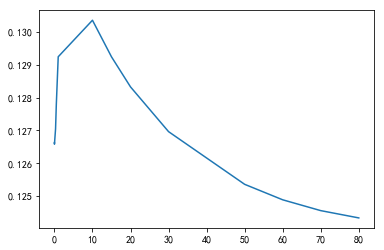

In [368]:
plt.plot(r_alphas,scores)

In [369]:
r_alpha2 = np.logspace(-10,5,100)

In [ ]:
scores = []
for k in r_alpha2:
    scores.append(ridge_train_test(k))
plt.plot(r_alpha2,scores)